<a href="https://colab.research.google.com/github/yash1908/IDS/blob/main/HW5/HW5prob_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
# Load data 

data = pd.read_csv('wine_flag_all.csv')
data

In [ ]:
# describing data

data.describe()

,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


In [ ]:
# getting data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          3345 non-null   object
 1   Alcohol_flag  3345 non-null   object
 2   Sugar_flag    3345 non-null   object
dtypes: object(3)
memory usage: 78.5+ KB


In [ ]:
# Checking for null values

data.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

# lets do some Label Encoding

* Type          - Red = 0, White = 1
* Alcohol_flag  - Low = 0, High = 1
* Sugar_flag    - Low = 0, High = 1

In [ ]:
data_lable_encoded = data.replace({'Red' : 0, 'White' : 1, 'Low' : 0, 'High' : 1})
data_lable_encoded

,Type,Alcohol_flag,Sugar_flag
0,0,1,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,0
...,...,...,...
3340,1,1,1
3341,1,1,0
3342,1,1,0
3343,1,1,0


In [ ]:
# plotting contingency table of Type vs Alcohol

data_crosstab_alcohol = pd.crosstab(data['Type'], data['Alcohol_flag'])
data_crosstab_alcohol

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


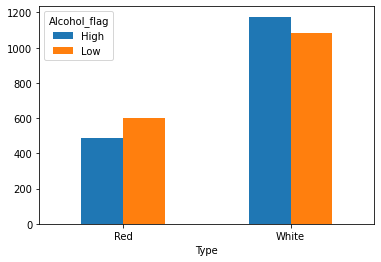

In [ ]:
plot = data_crosstab_alcohol.plot.bar(rot=0)

In [ ]:
# plotting contingency table of Type vs Sugar

data_crosstab_sugar = pd.crosstab(data['Type'], data['Sugar_flag'])
data_crosstab_sugar

Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


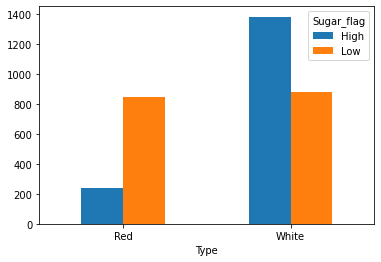

In [ ]:
plot = data_crosstab_sugar.plot.bar(rot=0)

In [ ]:
# probability of Type red = total number of type red / total number of type Red+White

alcohol_red = (data_crosstab_alcohol['High']['Red'] + data_crosstab_alcohol['Low']['Red'])/len(data)
alcohol_red

0.3243647234678625

In [ ]:
# probability of Type White = total number of type White / total number of type Red+White

alcohol_White = (data_crosstab_alcohol['High']['White'] + data_crosstab_alcohol['Low']['White'])/len(data)
alcohol_White

0.6756352765321375

In [ ]:
# probability of high alcohol = total number of high alcohol / total number of type alcohol

high_alcohol = (data_crosstab_alcohol['High']['Red'] + data_crosstab_alcohol['High']['White'])/len(data)
high_alcohol

0.49656203288490286

In [ ]:
# probability of low alcohol = total number of low alcohol / total number of type alcohol

low_alcohol = (data_crosstab_alcohol['Low']['Red'] + data_crosstab_alcohol['Low']['White'])/len(data)
low_alcohol

0.5034379671150971

In [ ]:
# probability of high sugar = total number of high sugar / total number of type sugar

high_sugar = (data_crosstab_sugar['High']['Red'] + data_crosstab_sugar['High']['White'])/len(data)
high_sugar

0.48400597907324366

In [ ]:
# probability of low sugar = total number of low sugar / total number of type sugar

low_sugar = (data_crosstab_sugar['Low']['Red'] + data_crosstab_sugar['Low']['White'])/len(data)
low_sugar

0.5159940209267564

In [ ]:
# Conditional probability of p(Alcohol_flag = high | Type = red)

cond_prob_alcohol_high_red = (data_crosstab_alcohol['High']['Red']/len(data))/alcohol_red
cond_prob_alcohol_high_red

0.4470046082949308

In [ ]:
# Conditional probability of p(Alcohol_flag = low | Type = red)

cond_prob_alcohol_low_red = (data_crosstab_alcohol['Low']['Red']/len(data))/alcohol_red
cond_prob_alcohol_low_red

0.5529953917050691

In [ ]:
# Conditional probability of p(Sugar_flag = high | Type = red)

cond_prob_sugar_high_red = (data_crosstab_sugar['High']['Red']/len(data))/alcohol_red
cond_prob_sugar_high_red

0.21843317972350232

In [ ]:
# Conditional probability of p(Sugar_flag = low | Type = red)

cond_prob_sugar_low_red = (data_crosstab_sugar['Low']['Red']/len(data))/alcohol_red
cond_prob_sugar_low_red

0.7815668202764977

In [ ]:
# seperating data points and target variables

X = data_lable_encoded.drop('Type', axis=1)
y = data_lable_encoded['Type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# 90-10 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify = y, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print()
print()

tn, fp, fn, tp = cm.ravel()

print('True Negative = ', tn),
print('False Positive = ',fp),
print('False Negative = ',fn),
print('True Positive = ',tp)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)*100
print()
print()
print("Accuracy score is", acc)

Confusion Matrix
[[ 49  60]
 [ 27 199]]


True Negative =  49
False Positive =  60
False Negative =  27
True Positive =  199


Accuracy score is 74.02985074626865


# 80-20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify = y, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print()
print()

tn, fp, fn, tp = cm.ravel()

print('True Negative = ', tn),
print('False Positive = ',fp),
print('False Negative = ',fn),
print('True Positive = ',tp)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)*100
print()
print()
print("Accuracy score is", acc)

# 75-25 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print()
print()

tn, fp, fn, tp = cm.ravel()

print('True Negative = ', tn),
print('False Positive = ',fp),
print('False Negative = ',fn),
print('True Positive = ',tp)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)*100
print()
print()
print("Accuracy score is", acc)

Confusion Matrix
[[123 148]
 [ 71 495]]


True Negative =  123
False Positive =  148
False Negative =  71
True Positive =  495


Accuracy score is 73.83512544802868


# 70-30 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print()
print()

tn, fp, fn, tp = cm.ravel()

print('True Negative = ', tn),
print('False Positive = ',fp),
print('False Negative = ',fn),
print('True Positive = ',tp)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)*100
print()
print()
print("Accuracy score is", acc)

Confusion Matrix
[[146 180]
 [ 87 591]]


True Negative =  146
False Positive =  180
False Negative =  87
True Positive =  591


Accuracy score is 73.40637450199203


# 60-40 split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify = y, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print()
print()

tn, fp, fn, tp = cm.ravel()

print('True Negative = ', tn),
print('False Positive = ',fp),
print('False Negative = ',fn),
print('True Positive = ',tp)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)*100
print()
print()
print("Accuracy score is", acc)

Confusion Matrix
[[196 238]
 [117 787]]


True Negative =  196
False Positive =  238
False Negative =  117
True Positive =  787


Accuracy score is 73.4678624813154


# 50-50 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, stratify = y, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test) 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix')
print(cm)
print()
print()

tn, fp, fn, tp = cm.ravel()

print('True Negative = ', tn),
print('False Positive = ',fp),
print('False Negative = ',fn),
print('True Positive = ',tp)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)*100
print()
print()
print("Accuracy score is", acc)

Confusion Matrix
[[432 111]
 [465 665]]


True Negative =  432
False Positive =  111
False Negative =  465
True Positive =  665


Accuracy score is 65.57083084279736


# Summary

* we can see that the max accuracy we got is 74.02% by doing 90-10 split
* as we decrease the training data, there is significat drop in accuracy
* at 50-50 split the model is giving 65.57% accuracy